Rasmus Dahlberg, Khaled Ahmed, Wille Kolu, Sergey Hayrapetyan

https://www.kaggle.com/datasets/preethamgouda/financial-risk/data

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
from sklearn.linear_model import LinearRegression

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

!pip install statsmodels==0.14.2
import statsmodels.api as sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 34.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
data = pd.read_csv("financial_risk_assessment.csv")
data.head(10)

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low
5,30,Non-binary,PhD,Divorced,NaN,717.0,15613.0,Business,Unemployed,5,Fair,0.295984,NaN,4.0,Brianland,TN,Iceland,3.0,1,Medium
6,31,Non-binary,Master's,Widowed,45280.0,672.0,6553.0,Personal,Self-employed,1,Good,0.378890,NaN,NaN,West Lindaview,MD,Bouvet Island (Bouvetoya),0.0,1,Low
7,18,Male,Bachelor's,Widowed,93678.0,NaN,NaN,Business,Unemployed,10,Poor,0.396636,246597.0,1.0,Melissahaven,MA,Honduras,1.0,1,Low
8,32,Non-binary,Bachelor's,Widowed,20205.0,710.0,NaN,Auto,Unemployed,4,Fair,0.335965,227599.0,0.0,North Beverly,DC,Pitcairn Islands,4.0,2,Low
9,55,Male,Bachelor's,Married,32190.0,600.0,29918.0,Personal,Self-employed,5,Excellent,0.484333,130507.0,4.0,Davidstad,VT,Thailand,NaN,2,Low


In [ ]:
print(data.isnull().sum())
print(data.info())

Age                         0
Gender                      0
Education Level             0
Marital Status              0
Income                   2250
Credit Score             2250
Loan Amount              2250
Loan Purpose                0
Employment Status           0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value             2250
Number of Dependents     2250
City                        0
State                       0
Country                     0
Previous Defaults        2250
Marital Status Change       0
Risk Rating                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Statu

/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
Income:
p värde:(p = 0.000) kolumnen är inte normalfördelad

Credit Score:
p värde:(p = 0.000) kolumnen är inte normalfördelad

Loan Amount:
p värde:(p = 0.000) kolumnen är inte normalfördelad

Assets Value:
p värde:(p = 0.000) kolumnen är inte normalfördelad

Number of Dependents:
p värde:(p = 0.000) kolumnen är inte normalfördelad

Previous Defaults:
p värde:(p = 0.000) kolumnen är inte normalfördelad



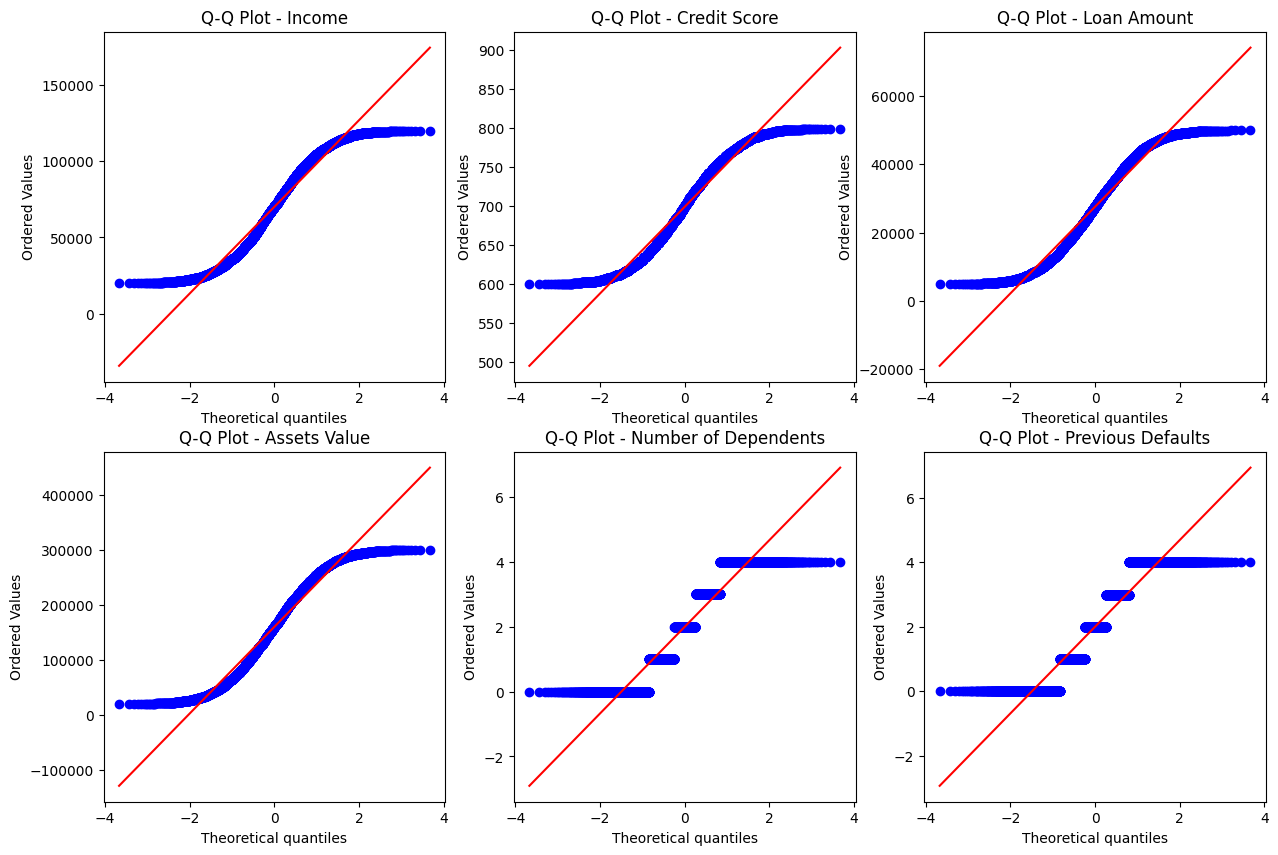

In [ ]:
data_dropped_nan = data.dropna()

#print(data_dropped_nan.info())
# print(data_dropped_nan.duplicated().sum())

# skapar en dataframe med de columnerna som behöver imputering
columns_to_impute = data_dropped_nan[['Income', 'Credit Score', 'Loan Amount', 'Assets Value', 'Number of Dependents', 'Previous Defaults']].copy()
columns_to_impute.head()

plt.figure(figsize=(15, 10))
plotnr = 1

for column in columns_to_impute:
    alpha = 0.05
    stat, p = stats.shapiro(data_dropped_nan[column])
    if p > alpha:
        print(f"{column}:\np värde:(p = {p:.3f}) kolumnen är normalfördelad\n")
    else:
        print(f"{column}:\np värde:(p = {p:.3f}) kolumnen är inte normalfördelad\n")
 
    plt.subplot(2, 3, plotnr)
    stats.probplot(data_dropped_nan[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot - {column}')
    plotnr+=1

In [ ]:
# Droppar alla dupelicates ifall det finns
data = data.drop_duplicates()

# Väljer kolumnerna som har numeriska värden(kvantitativ data)
quantitative_columns = ['Age', 'Years at Current Job', 'Debt-to-Income Ratio', 
                     'Income', 'Credit Score', 'Loan Amount', 
                     'Assets Value', 'Number of Dependents', 'Previous Defaults']

# Create a copy of the data to work on
data_imputation = data[quantitative_columns].copy()

# Standardizing the numerical columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputation)

# Apply KNN Imputation
n_neighbors = 3
knn_imputer = KNNImputer(n_neighbors=n_neighbors)
data_imputed_scaled = knn_imputer.fit_transform(data_scaled)

# Converting back to DataFrame and reversing standardization
data_imputed = pd.DataFrame(data_imputed_scaled, columns=quantitative_columns)
data_imputed[quantitative_columns] = scaler.inverse_transform(data_imputed[quantitative_columns])

# Convert specific columns back to integers
columns_to_convert = ['Income', 'Credit Score', 'Loan Amount', 'Assets Value', 'Number of Dependents', 'Previous Defaults']
data_imputed[columns_to_convert] = data_imputed[columns_to_convert].round(0).astype(int)

# Check the final dataset
data_imputed_knn = data.copy()  # Start with the original data
data_imputed_knn[quantitative_columns] = data_imputed  # Replace the numerical columns with the imputed data

# Utskrift av data
data_imputed_knn.head(10)

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49.0,Male,PhD,Divorced,72799,688,45713,Business,Unemployed,19.0,Poor,0.154313,120228,0,Port Elizabeth,AS,Cyprus,2,2,Low
1,57.0,Female,Bachelor's,Widowed,71083,690,33835,Auto,Employed,6.0,Fair,0.148920,55849,0,North Catherine,OH,Turkmenistan,3,2,Medium
2,21.0,Non-binary,Master's,Single,55687,600,36623,Home,Employed,8.0,Fair,0.362398,180700,3,South Scott,OK,Luxembourg,3,2,Medium
3,59.0,Male,Bachelor's,Single,26508,622,26541,Personal,Unemployed,2.0,Excellent,0.454964,157319,3,Robinhaven,PR,Uganda,4,2,Medium
4,25.0,Non-binary,Bachelor's,Widowed,49427,766,36528,Personal,Unemployed,10.0,Fair,0.143242,287140,2,New Heather,IL,Namibia,3,1,Low
5,30.0,Non-binary,PhD,Divorced,85320,717,15613,Business,Unemployed,5.0,Fair,0.295984,130626,4,Brianland,TN,Iceland,3,1,Medium
6,31.0,Non-binary,Master's,Widowed,45280,672,6553,Personal,Self-employed,1.0,Good,0.378890,145940,2,West Lindaview,MD,Bouvet Island (Bouvetoya),0,1,Low
7,18.0,Male,Bachelor's,Widowed,93678,623,25063,Business,Unemployed,10.0,Poor,0.396636,246597,1,Melissahaven,MA,Honduras,1,1,Low
8,32.0,Non-binary,Bachelor's,Widowed,20205,710,9023,Auto,Unemployed,4.0,Fair,0.335965,227599,0,North Beverly,DC,Pitcairn Islands,4,2,Low
9,55.0,Male,Bachelor's,Married,32190,600,29918,Personal,Self-employed,5.0,Excellent,0.484333,130507,4,Davidstad,VT,Thailand,1,2,Low


In [ ]:
#Gör en kopia av databasen 
data_imputed_mean = data.copy()

#Använder copian och väljer vilka kolumner som ska tas medelvärde på och onvndlar de till närmaste heltal 
data_imputed_mean[columns_to_convert] = data_imputed_mean[columns_to_convert].fillna(data_imputed_mean[columns_to_convert].mean().round())

# Skriver ut top 20
# data_imputed_mean.head(20)



In [ ]:
# Select columns to impute with median
df_to_impute = data[columns_to_convert]

# Impute missing values with median
df_to_impute = df_to_impute.fillna(df_to_impute.median())

# Copy original data and update with imputed columns
data_imputed_median = data.copy()
data_imputed_median[columns_to_convert] = df_to_impute


In [ ]:
column_to_test = 'Income'
stat, p_value = kruskal(data_dropped_nan[column_to_test], 
                        data_imputed_knn[column_to_test], 
                        data_imputed_mean[column_to_test], 
                        data_imputed_median[column_to_test]
                        )
print(f'Kruskal Wallis test för {column_to_test}:\nH-statistik = {stat:.3f}, p-value = {p_value:.3f}')

alpha = 0.05
if p_value >alpha:
    print(f'Förkasta inte nollhypotesen. Ingen signifikant skillnad mellan grupperna.')
else:
    print(f'Förkasta nollhypotesen. Signifikant skillnad mellan grupperna.')


Kruskal Wallis test för Income:
H-statistik = 4.808, p-value = 0.186
Förkasta inte nollhypotesen. Ingen signifikant skillnad mellan grupperna.


In [ ]:
# Income
# Credit Score
# Loan Amount
# Assets Value
# Number of Dependents
# Previous Defaults

column_to_compare = 'Income'

df_baseline = data[[column_to_compare]].copy()
df_dropped = data_dropped_nan[[column_to_compare]].copy()
df_knn = data_imputed_knn[[column_to_compare]].copy()
df_mean = data_imputed_mean[[column_to_compare]].copy()
df_median = data_imputed_median[[column_to_compare]].copy()

df_baseline['Method'] = 'Baseline'
df_dropped['Method'] = 'Dropped'
df_knn['Method'] = 'KNN'
df_mean['Method'] = 'Mean'
df_median['Method'] = 'Median'

df_impute_compare = pd.concat([df_baseline, df_dropped, df_knn, df_mean, df_median])


# fig = px.box(df_impute_compare, x='Method', y=column_to_compare, title=f'{column_to_compare} Distribution by Imputation Method')
fig = px.violin(df_impute_compare, x='Method', y=column_to_compare, box=True,
title=f'{column_to_compare} Distribution by Imputation Method')

fig.show()

print(f"df_baseline count: {df_baseline['Income'].count()}\n"
      f"df_dropped count: {df_dropped['Income'].count()}\n"
      f"df_knn count: {df_knn['Income'].count()}")

df_baseline count: 12750
df_dropped count: 5716
df_knn count: 15000


In [ ]:
# Specify the columns to one-hot encode
columns_to_encode = ['Gender', 'Marital Status', 'Employment Status',]

# One-hot encode the selected columns
data_encoded = pd.get_dummies(data_imputed_knn, columns=columns_to_encode, drop_first=True)

# Ordinal encoding
education_order = ["High School", "Bachelor's", "Master's", "PhD"]
payment_history_order = ["Poor", "Fair", "Good", "Excellent"]
risk_rating_order = ["Low", "Medium", "High", "Very High"]

ordinal_mappings = {
    "Education Level": education_order,
    "Payment History": payment_history_order,
    "Risk Rating": risk_rating_order
}

ordinal_encoder = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_mappings.keys()])
encoded_columns = ordinal_encoder.fit_transform(data[ordinal_mappings.keys()])

data_encoded[list(ordinal_mappings.keys())] = encoded_columns


# Drop any remaining non-numeric columns that were not encoded
numeric_data = data_encoded.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Round the correlation matrix to 2 decimal places for display
correlation_matrix_rounded = np.round(correlation_matrix, 2)

# Create a heatmap using Plotly Express
fig = px.imshow(correlation_matrix_rounded,
                text_auto='.2f',  # Display values with 2 decimal places
                aspect="auto",
                color_continuous_scale='RdBu_r',  # Red to Blue reversed for correlation
                zmin=-1, zmax=1,  # Correlation ranges from -1 to 1
                title='Correlation Heatmap of Financial Risk Assessment Data')

# Show the heatmap
fig.show()


                            OLS Regression Results                            
Dep. Variable:            Loan Amount   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     17.52
Date:                Fri, 23 Aug 2024   Prob (F-statistic):           2.86e-05
Time:                        09:30:39   Log-Likelihood:            -1.6252e+05
No. Observations:               15000   AIC:                         3.251e+05
Df Residuals:                   14998   BIC:                         3.251e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.636e+04 

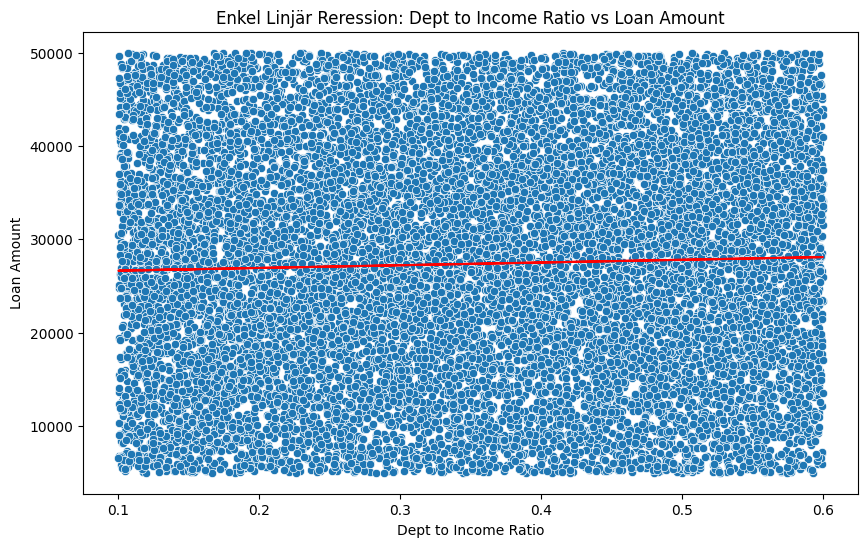

In [ ]:
# Select the columns for the regression
X = data_encoded[['Debt-to-Income Ratio']]  # X-axis
y = data_encoded['Loan Amount']  # Y-axis

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Debt-to-Income Ratio', y = 'Loan Amount', data = data_encoded)
plt.plot(data_encoded['Debt-to-Income Ratio'], model.predict(X), color='red')
plt.title('Enkel Linjär Reression: Dept to Income Ratio vs Loan Amount')
plt.xlabel('Dept to Income Ratio')
plt.ylabel('Loan Amount')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1782
Date:                Fri, 23 Aug 2024   Prob (F-statistic):              0.673
Time:                        09:29:03   Log-Likelihood:            -1.7468e+05
No. Observations:               15000   AIC:                         3.494e+05
Df Residuals:                   14998   BIC:                         3.494e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.967e+04    695.030    100.239      0.0

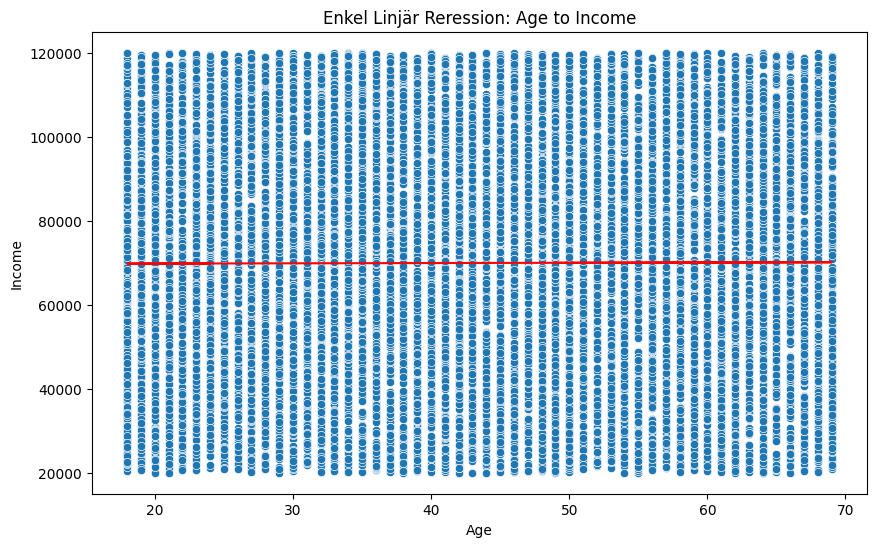

In [ ]:
# Select the columns for the regression
X = data_encoded[['Age']]  # X-axis
y = data_encoded['Income']  # Y-axis

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Age', y = 'Income', data = data_encoded)
plt.plot(data_encoded['Age'], model.predict(X), color='red')
plt.title('Enkel Linjär Reression: Age to Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=07f04956-ee14-40fc-95b0-1a7d4d984635' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>